In [41]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [42]:
mnist = input_data.read_data_sets("./MNIST_Data", one_hot=True)
train = mnist.train.next_batch(1000)
trainX = train[0]
trainY = train[1]

Extracting ./MNIST_Data\train-images-idx3-ubyte.gz
Extracting ./MNIST_Data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_Data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_Data\t10k-labels-idx1-ubyte.gz


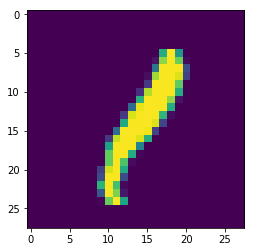

In [43]:
plt.imshow(train[0][0].reshape(28, 28))

In [44]:
def softmax(X):
    e = np.exp(X)
    softmax = e / np.sum(e, axis=1).reshape((-1, 1))
    return softmax


In [1]:
def sigmoid(x, derivative=False):
    sigma = 1/(1+np.exp(-(x)))
    if derivative:
        return sigma * (1-sigma)
    else:
        return sigma

In [95]:
train[0].shape

weights=np.zeros((784, 10))
alpha=.01
epochs= 1000

for i in range(epochs):

    hyp=softmax(np.matmul(trainX,weights))
        
    dist=hyp-trainY
    gradient=np.matmul(trainX.T,dist)/trainX.shape[0]
        
    weights-=gradient*alpha

In [96]:
hyp=softmax(np.matmul(trainX,weights))
pred=np.argmax(hyp, axis=1)
real=np.argmax(trainY,axis=1)
accuracy_score(real,pred)

0.913

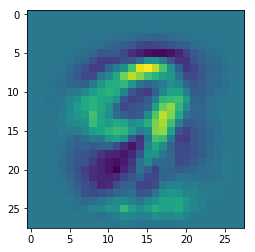

In [111]:
plt.imshow(weights[:, 9].reshape(28, 28))